In [1]:
%config InlineBackend.figure_formats = ["svg"]
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.power import TTestIndPower
import warnings

%matplotlib inline
plt.style.use("seaborn-v0_8")

(2.a) The null hypothesis $H_0$ for RQ1 is: There is *no* statistical significance in the growth difference between the once-per-week group and the twice-per-week group.

(2.b) We will be measuring the growth rate of the two groups of cacti, and using a t-test to determine statistical significance. The **groups** are cacti that were fertilized once, and cacti that were fertliized twice. The **response variable** will be the growth rate of the cacti.

(2.c) We perform a power analysis to determine how many samples we would need to answer RQ1 with a “medium” effect size:

In [2]:
effect_size = 0.5 # A “medium” effect size according to https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174/#:~:text=Cohen%20classified%20effect%20sizes%20as,eye%20of%20a%20careful%20observer.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    nobs_needed = TTestIndPower().solve_power(effect_size=0.5, nobs1=None, alpha=0.05, power=0.8, ratio=1)
nobs_needed

63.76561058785405

(2.d) Now it’s time to load the data:

In [3]:
data = pd.read_csv("exp_data.csv")

(2.e.i) Now, let’s take a look at the first few rows of the data:

In [4]:
data.head()

,fert_grp,height_start,hours_sun,flowered,num_leaves_start,height_final,num_leaves_final
0,1,5.44,2,0,6,7.91,8
1,1,4.08,0,0,6,7.11,5
2,1,8.24,6,0,6,10.99,5
3,1,8.63,1,0,6,11.31,7
4,1,3.98,0,1,7,6.81,1


(2.e.ii) We can generate descriptive statistics for the data:

In [5]:
data.describe()

,fert_grp,height_start,hours_sun,flowered,num_leaves_start,height_final,num_leaves_final
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.500000,6.539769,4.330769,0.407692,6.076923,9.346538,4.153846
std,0.501934,2.227443,2.556004,0.493306,1.361801,2.253910,2.757545
min,1.000000,-1.840000,0.000000,0.000000,4.000000,0.480000,0.000000
25%,1.000000,5.002500,2.000000,0.000000,5.000000,7.762500,1.000000
50%,1.500000,6.580000,4.500000,0.000000,6.000000,9.410000,4.000000
75%,2.000000,8.207500,7.000000,1.000000,7.000000,10.877500,7.000000
max,2.000000,11.640000,8.000000,1.000000,8.000000,14.580000,8.000000


(2.e.iii) This shows a potential problem in the data: at least one data point has a negative value for `height_start`. We should throw out the bad data, by dropping the affected rows:

In [6]:
data = data[data.height_start >= 0]

(2.e.iv) Now, we can recalculate the descriptive statistics:

In [7]:
data.describe()

,fert_grp,height_start,hours_sun,flowered,num_leaves_start,height_final,num_leaves_final
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1.496124,6.604729,4.333333,0.410853,6.069767,9.415271,4.178295
std,0.501934,2.108889,2.565801,0.493907,1.364655,2.121521,2.754115
min,1.000000,0.880000,0.000000,0.000000,4.000000,2.640000,0.000000
25%,1.000000,5.100000,2.000000,0.000000,5.000000,7.830000,1.000000
50%,1.000000,6.590000,5.000000,0.000000,6.000000,9.420000,4.000000
75%,2.000000,8.230000,7.000000,1.000000,7.000000,10.880000,7.000000
max,2.000000,11.640000,8.000000,1.000000,8.000000,14.580000,8.000000


(2f) We can add a `growth_rate` column to help our analysis:

In [8]:
data["delta_height"] = data["height_final"] - data["height_start"]
data["growth_rate"] = data["delta_height"] / data["height_start"]
data.groupby("fert_grp").head()

,fert_grp,height_start,hours_sun,flowered,num_leaves_start,height_final,num_leaves_final,delta_height,growth_rate
0,1,5.44,2,0,6,7.91,8,2.47,0.454044
1,1,4.08,0,0,6,7.11,5,3.03,0.742647
2,1,8.24,6,0,6,10.99,5,2.75,0.333738
3,1,8.63,1,0,6,11.31,7,2.68,0.310545
4,1,3.98,0,1,7,6.81,1,2.83,0.711055
65,2,5.20,5,1,7,8.38,1,3.18,0.611538
66,2,8.56,4,1,6,10.53,4,1.97,0.230140
67,2,3.39,1,1,4,5.73,1,2.34,0.690265
68,2,8.49,7,0,7,10.27,7,1.78,0.209658
69,2,8.86,4,0,6,11.25,8,2.39,0.269752


(2g) A histogram can help us examine visually whether the data is normally distributed:

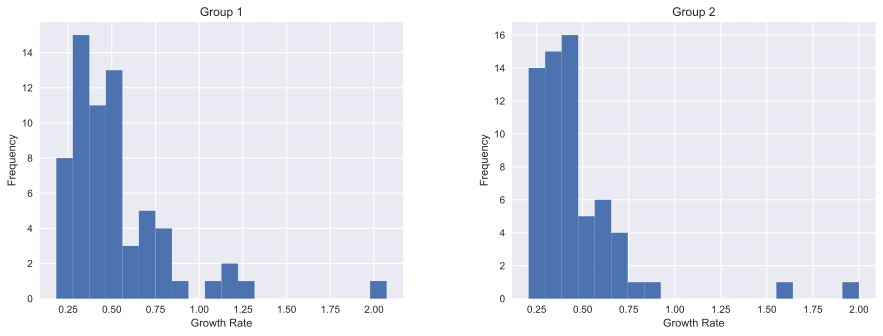

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
data[data["fert_grp"] == 1].hist("growth_rate", ax=axs[0], bins=20)
data[data["fert_grp"] == 2].hist("growth_rate", ax=axs[1], bins=20)
# Graph formatting
axs[0].set_title("Group 1"); axs[1].set_title("Group 2")
axs[0].set_ylabel("Frequency"); axs[1].set_ylabel("Frequency")
axs[0].set_xlabel("Growth Rate"); axs[1].set_xlabel("Growth Rate")
None